In [1]:
library(Seurat)
library(CellChat)
library(pheatmap)

Attaching SeuratObject

载入需要的程辑包：dplyr


载入程辑包：‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


载入需要的程辑包：igraph


载入程辑包：‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


载入需要的程辑包：ggplot2



In [2]:
sle<-readRDS('./sle_hd_merge_1126.rds')

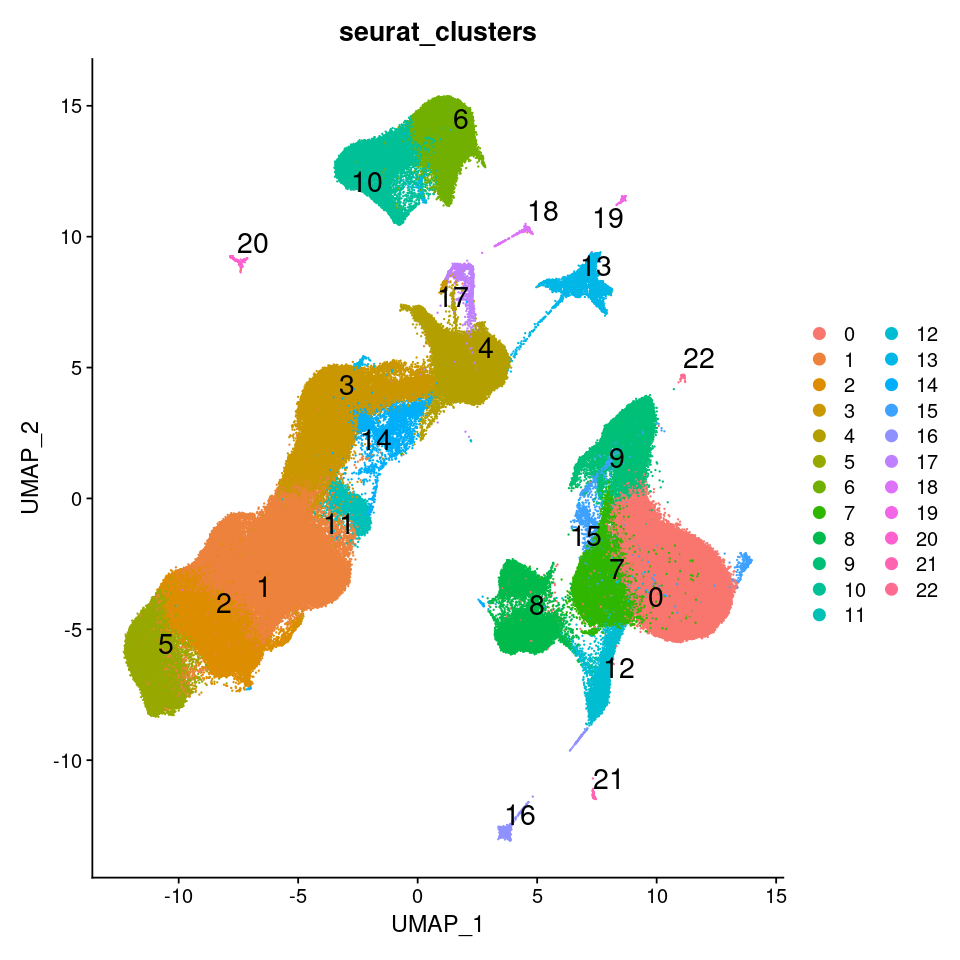

In [3]:
options(repr.plot.width=8,repr.plot.height=8)

DimPlot(sle,group.by=c('seurat_clusters'),label=T,raster=F,label.size=6,repel=T,pt.size=0.01)

## T

In [4]:
####t
DefaultAssay(sle)<-'integrated'
sle_sub<-subset(sle,seurat_clusters%in%c(1,2,3,5,11,14))
sle_sub<-RunPCA(sle_sub)
sle_sub <- RunUMAP(object = sle_sub, dims = 1:20)
sle_sub <- FindNeighbors(sle_sub , reduction = "pca", dims = 1:20)
sle_sub<-FindClusters(sle_sub,res=0.25)

PC_ 1 
Positive:  IL7R, CD3D, CD3G, CD3E, TCF7, LDHB, BCL11B, LEF1, IL32, RPS27 
	   RCAN3, RPL13, CAMK4, RPS6, MAL, RPS12, RPS18, RPS3, CD27, OXNAD1 
	   CD2, LTB, RPS29, ETS1, SPOCK2, TRABD2A, RPL3, LEPROTL1, C12orf57, NOSIP 
Negative:  HLA-DRA, TYROBP, LYN, HLA-DRB1, FCER1G, CD74, CYBB, ZEB2, CTSZ, HLA-DQB1 
	   CTSS, HLA-DPA1, CST3, APLP2, MNDA, FGL2, MARCKS, MARCH1, HLA-DRB5, SPI1 
	   MPEG1, FCN1, GRN, CEBPD, PLEK, SYK, TYMP, MEF2C, PSAP, FGR 
PC_ 2 
Positive:  CCR7, LEF1, RCAN3, MAL, TRABD2A, IL6ST, LRRN3, SELL, TSHZ2, FHIT 
	   LTB, TCF7, ACTN1, PIK3IP1, OXNAD1, ADTRP, RGS10, CD27, RPL13, SH3YL1 
	   CAMK4, SATB1, NELL2, MYC, FOXP1, SPINT2, ABLIM1, NOSIP, RPS12, TCEA3 
Negative:  CST7, GZMH, GZMA, NKG7, CCL5, FGFBP2, KLRD1, PRF1, MYBL1, GZMB 
	   GNLY, KLRG1, TGFBR3, CTSW, C12orf75, FCRL6, C1orf21, HOPX, SAMD3, CCL4 
	   LYAR, SYNE2, SYNE1, KLRC2, PYHIN1, RUNX3, APOBEC3G, MATK, TBX21, ZNF683 
PC_ 3 
Positive:  CD8B, CD8A, LRRN3, GZMH, NUCB2, FGFBP2, KLRC4, CRTAM, GZMB, APBA2 
	

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 151626
Number of edges: 3975610

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9240
Number of communities: 9
Elapsed time: 61 seconds


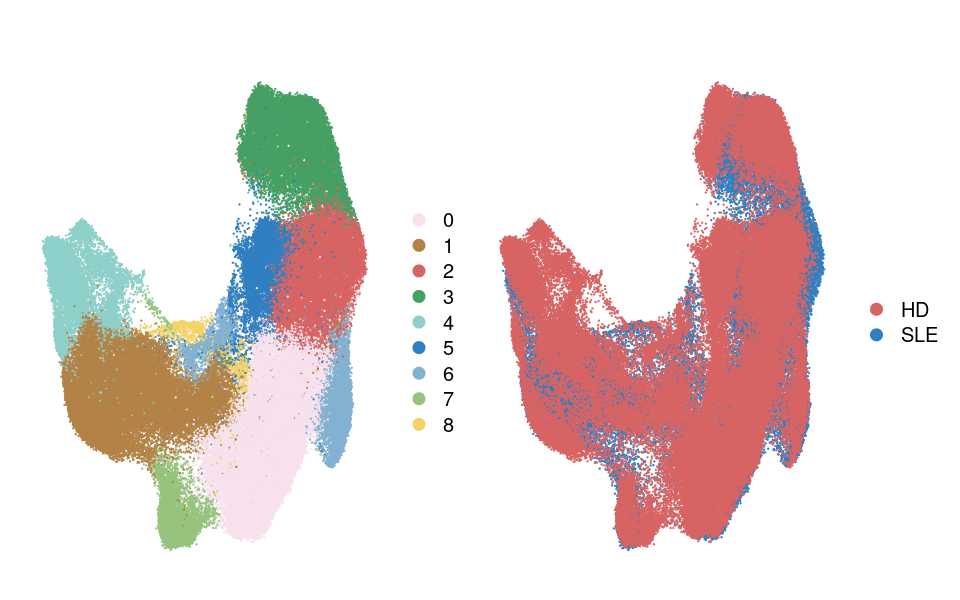

In [45]:
options(repr.plot.width=8,repr.plot.height=5)
sle_sub@meta.data$orig.ident<-toupper(sle_sub@meta.data$orig.ident)
dir.create("./sle_picture2/T/")
p1<-DimPlot(sle_sub,group.by='seurat_clusters',label=F,raster=F,label.size=6,repel=T,pt.size=0.01,cols=c('#f7e1ed','#b28247','#d86363','#44a064','#8dcfc9',
                                            '#2f7fc1','#82b1d2','#96c37d','#f4d267','#e88482','#c498b2', '#9394e7' ))+theme(
                                                                              axis.title.x=element_blank(),
                                                                              axis.text.x=element_blank(),
                                                                              axis.ticks.x=element_blank(),
                                                                              axis.title.y=element_blank(),
                                                                              axis.text.y=element_blank(),
                                                                              axis.ticks.y=element_blank(),
                                                                              axis.line=element_blank())+labs(title='')
p2<-DimPlot(sle_sub,group.by=c('orig.ident'),label=F,raster=F,label.size=4,repel=T,pt.size=0.01,cols=c('#d86363','#2f7fc1'))+theme(
                                                                              axis.title.x=element_blank(),
                                                                              axis.text.x=element_blank(),
                                                                              axis.ticks.x=element_blank(),
                                                                              axis.title.y=element_blank(),
                                                                              axis.text.y=element_blank(),
                                                                              axis.ticks.y=element_blank(),
                                                                              axis.line=element_blank())+labs(title='')
p<-p1+p2
p
ggsave(p, file="./sle_picture2/T/T_dimplot.pdf",width = 8, height = 5)

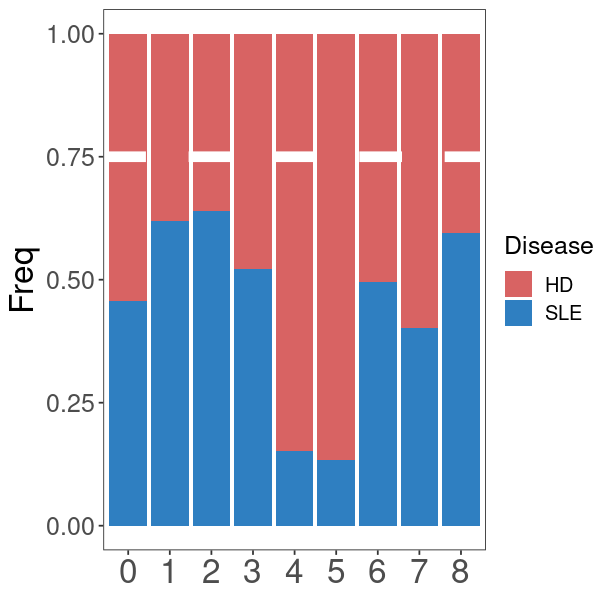

In [44]:
options(repr.plot.width=5,repr.plot.height=5)
count<-as.data.frame(table(sle_sub@meta.data$seurat_clusters,sle_sub@meta.data$orig.ident))
count$Var2<-toupper(count$Var2)
colnames(count)<-c('Var1','Disease','Freq')
p<-ggplot(count)+geom_bar(aes(x=Var1,y=Freq,fill=Disease),stat='identity',position = 'fill')+theme_test()+geom_hline(yintercept=0.75,color='white',size=3,lty=2)+
theme( 
      axis.text.x=element_text(size=20),
      axis.title.x=element_blank(),
     # axis.ticks.x=element_blank(),
      axis.title.y=element_text(size=20),
     axis.text.y=element_text(size=15),
    legend.title=element_text(size=15),
legend.text=element_text(size=12),legend.position = 'right')+
scale_fill_manual(values=c('#d86363','#2f7fc1'))
p
ggsave(p, file="./sle_picture/T/T_bar.pdf",width = 8, height = 5)

## NK

In [6]:
####nk
DefaultAssay(sle)<-'integrated'
sle_sub1<-subset(sle,seurat_clusters%in%c(4,17))
sle_sub1<-RunPCA(sle_sub1)
sle_sub1 <- RunUMAP(object = sle_sub1, dims = 1:20)
sle_sub1 <- FindNeighbors(sle_sub1 , reduction = "pca", dims = 1:20)
sle_sub1<-FindClusters(sle_sub1,res=0.1)

PC_ 1 
Positive:  KLRF1, SPON2, IL2RB, CLIC3, PRF1, KLRD1, GZMB, AKR1C3, SH2D1B, FGFBP2 
	   MYOM2, NCAM1, KLRC1, HOPX, GNLY, CST7, GZMA, CTSW, S1PR5, NKG7 
	   NCR1, PTGDR, CD160, FCGR3A, IGFBP7, CHST2, MATK, TBX21, XCL2, KLRB1 
Negative:  COTL1, CD3D, NCF1, CD3G, ANXA5, RGS10, YBX3, CTSH, CD4, CYBB 
	   CD44, AIF1, FCGRT, VIM, RNASET2, BRI3, MARCH1, TMEM154, HLA-DQB1, POU2F2 
	   PLP2, MPEG1, NFKBIZ, RCAN3, SPI1, MNDA, NCF2, HLA-DRB5, IFNGR2, MARCKS 
PC_ 2 
Positive:  TYMS, MKI67, CLSPN, TOP2A, TK1, RRM2, NUSAP1, TPX2, BIRC5, CDT1 
	   ZWINT, ASPM, CDK1, MCM10, DTL, GINS2, CENPF, FAM111B, E2F1, KIF11 
	   ESCO2, GTSE1, CENPU, CENPM, HMMR, KIF15, NCAPG, MCM4, KIFC1, ASF1B 
Negative:  TXNIP, MALAT1, JUNB, CLIC3, FTL, BTG1, RPS27, CD37, KLRF1, RPL13 
	   TMSB4X, CTSS, TYROBP, SPON2, EEF1A1, TSC22D3, FCER1G, RPS12, ZFP36L2, KLRB1 
	   PLAC8, SRGN, PTGDR, HCST, RPS29, MYOM2, NEIL1, RPS18, KLRD1, RPL3 
PC_ 3 
Positive:  XCL1, SPTSSB, XCL2, PPP1R9A, KLRC1, AREG, KIR2DL4, GZMK, IGFBP4, IL18R

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 26893
Number of edges: 874212

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9572
Number of communities: 9
Elapsed time: 3 seconds


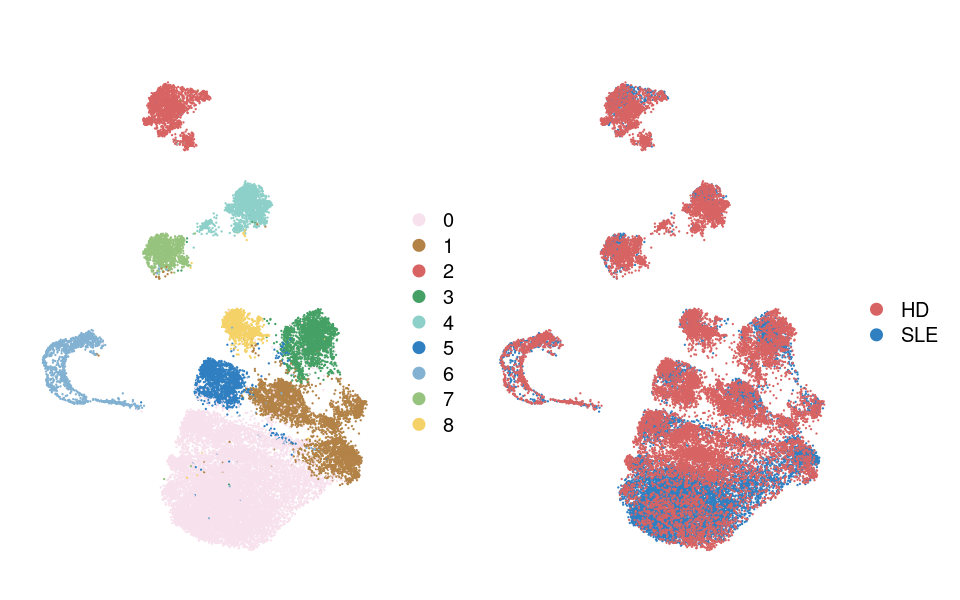

In [7]:
options(repr.plot.width=8,repr.plot.height=5)
dir.create("./sle_picture2/NK/")
sle_sub1@meta.data$orig.ident<-toupper(sle_sub1@meta.data$orig.ident)
p1<-DimPlot(sle_sub1,group.by='seurat_clusters',label=F,raster=F,label.size=6,repel=T,pt.size=0.01,cols=c('#f7e1ed','#b28247','#d86363','#44a064','#8dcfc9',
                                            '#2f7fc1','#82b1d2','#96c37d','#f4d267'))+theme(
                                                                              axis.title.x=element_blank(),
                                                                              axis.text.x=element_blank(),
                                                                              axis.ticks.x=element_blank(),
                                                                              axis.title.y=element_blank(),
                                                                              axis.text.y=element_blank(),
                                                                              axis.ticks.y=element_blank(),
                                                                              axis.line=element_blank())+labs(title='')
p2<-DimPlot(sle_sub1,group.by=c('orig.ident'),label=F,raster=F,label.size=4,repel=T,pt.size=0.01,cols=c('#d86363','#2f7fc1'))+theme(
                                                                              axis.title.x=element_blank(),
                                                                              axis.text.x=element_blank(),
                                                                              axis.ticks.x=element_blank(),
                                                                              axis.title.y=element_blank(),
                                                                              axis.text.y=element_blank(),
                                                                              axis.ticks.y=element_blank(),
                                                                              axis.line=element_blank())+labs(title='')

p<-p1+p2
p
ggsave(p, file="./sle_picture2/NK/NK_dimplot.pdf",width = 8, height = 5)

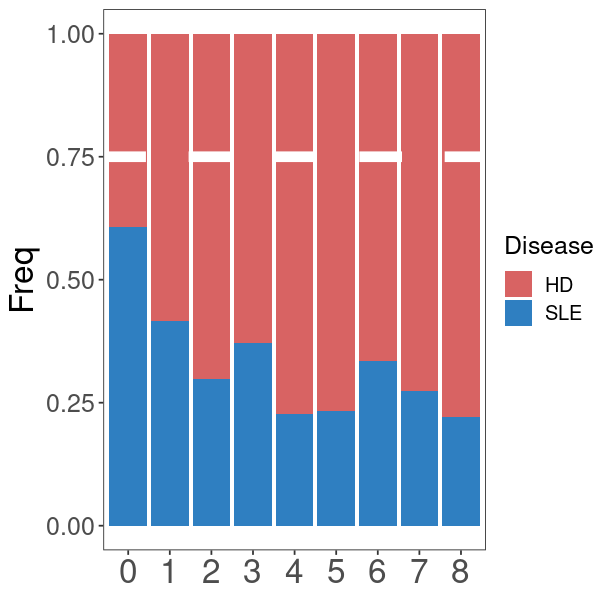

In [9]:
options(repr.plot.width=5,repr.plot.height=5)
count<-as.data.frame(table(sle_sub1@meta.data$seurat_clusters,sle_sub1@meta.data$orig.ident))
count$Var2<-toupper(count$Var2)
colnames(count)<-c('Var1','Disease','Freq')
p<-ggplot(count)+geom_bar(aes(x=Var1,y=Freq,fill=Disease),stat='identity',position = 'fill')+theme_test()+geom_hline(yintercept=0.75,color='white',size=3,lty=2)+
theme( 
      axis.text.x=element_text(size=20),
      axis.title.x=element_blank(),
     # axis.ticks.x=element_blank(),
      axis.title.y=element_text(size=20),
     axis.text.y=element_text(size=15),
    legend.title=element_text(size=15),
legend.text=element_text(size=12),legend.position = 'right')+
scale_fill_manual(values=c('#d86363','#2f7fc1'))
p
ggsave(p, file="./sle_picture/NK/NK_bar.pdf",width = 8, height = 5)

## B

In [8]:
###b
DefaultAssay(sle)<-'integrated'
sle_sub2<-subset(sle,seurat_clusters%in%c(6,10))
sle_sub2<-RunPCA(sle_sub2)
sle_sub2 <- RunUMAP(object = sle_sub2, dims = 1:20)
sle_sub2 <- FindNeighbors(sle_sub2 , reduction = "pca", dims = 1:20)
sle_sub2<-FindClusters(sle_sub2,res=0.3)

PC_ 1 
Positive:  MS4A1, CD79A, BANK1, TNFRSF13C, LINC00926, RALGPS2, PAX5, VPREB3, CD22, AFF3 
	   CD79B, FAM129C, TCL1A, BLK, HLA-DOB, FCRL1, COBLL1, BCL11A, EBF1, P2RX5 
	   FCRL5, POU2AF1, SWAP70, SPIB, ADAM28, FCER2, HLA-DQA1, COL19A1, FCRLA, GNG7 
Negative:  HCST, SAMHD1, ANXA1, SRGN, GIMAP7, S100A4, S100A11, S100A10, S100A6, CD3E 
	   ID2, SPN, ITGB2, IQGAP2, CD3G, CD3D, ARL4C, CD2, SLFN5, LEPROTL1 
	   EFHD2, MYO1F, CTSD, AIF1, TYROBP, RGS10, IL7R, FCER1G, DOK2, CD7 
PC_ 2 
Positive:  TCL1A, COL19A1, PCDH9, KCNG1, FCER2, IL4R, CD200, BCL7A, TSPAN13, YBX3 
	   MACROD2, BACH2, ABCB4, DSP, CD72, SCN3A, P2RY14, CNTNAP2, SESN1, APLP2 
	   CDCA7L, FCRL1, BTLA, H1FX, SLC38A11, CXCR4, STAG3, TCL1B, EPB41L2, FAM111B 
Negative:  TNFRSF13B, SSPN, AIM2, TEX9, COL4A4, CPNE5, BHLHE41, CLECL1, COCH, ZBTB32 
	   TLR10, POU2AF1, KLK1, CD82, CD70, OSBPL10, ACP5, BTNL9, PLEKHG7, SOX5 
	   SPIB, CCDC50, BLK, OSBPL10-AS1, BACE2, PPP1R14A, SCIMP, GRAMD1C, MARC2, GPR183 
PC_ 3 
Positive:  FCRL5, PPP1

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 31236
Number of edges: 992715

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9024
Number of communities: 9
Elapsed time: 4 seconds


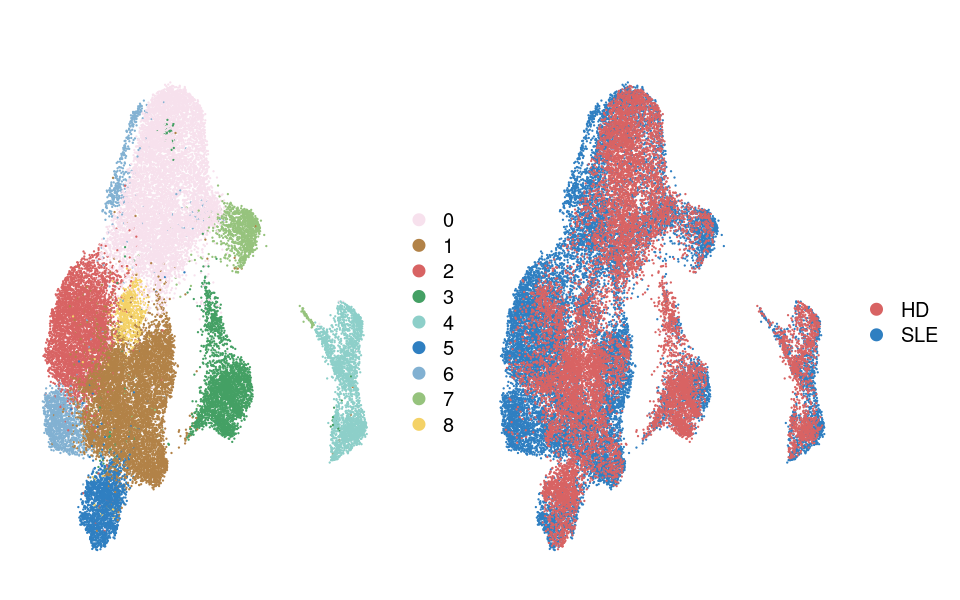

In [9]:
dir.create("./sle_picture2/B/")
options(repr.plot.width=8,repr.plot.height=5)
sle_sub2@meta.data$orig.ident<-toupper(sle_sub2@meta.data$orig.ident)
p1<-DimPlot(sle_sub2,group.by='seurat_clusters',label=F,raster=F,label.size=6,repel=T,pt.size=0.01,cols=c('#f7e1ed','#b28247','#d86363','#44a064','#8dcfc9',
                                            '#2f7fc1','#82b1d2','#96c37d','#f4d267'))+theme(
                                                                              axis.title.x=element_blank(),
                                                                              axis.text.x=element_blank(),
                                                                              axis.ticks.x=element_blank(),
                                                                              axis.title.y=element_blank(),
                                                                              axis.text.y=element_blank(),
                                                                              axis.ticks.y=element_blank(),
                                                                              axis.line=element_blank())+labs(title='')
p2<-DimPlot(sle_sub2,group.by=c('orig.ident'),label=F,raster=F,label.size=4,repel=T,pt.size=0.01,cols=c('#d86363','#2f7fc1'))+theme(
                                                                              axis.title.x=element_blank(),
                                                                              axis.text.x=element_blank(),
                                                                              axis.ticks.x=element_blank(),
                                                                              axis.title.y=element_blank(),
                                                                              axis.text.y=element_blank(),
                                                                              axis.ticks.y=element_blank(),
                                                                              axis.line=element_blank())+labs(title='')
p1+p2
p<-p1+p2
ggsave(p, file="./sle_picture2/B/B_dimplot.pdf",width = 8, height = 5)

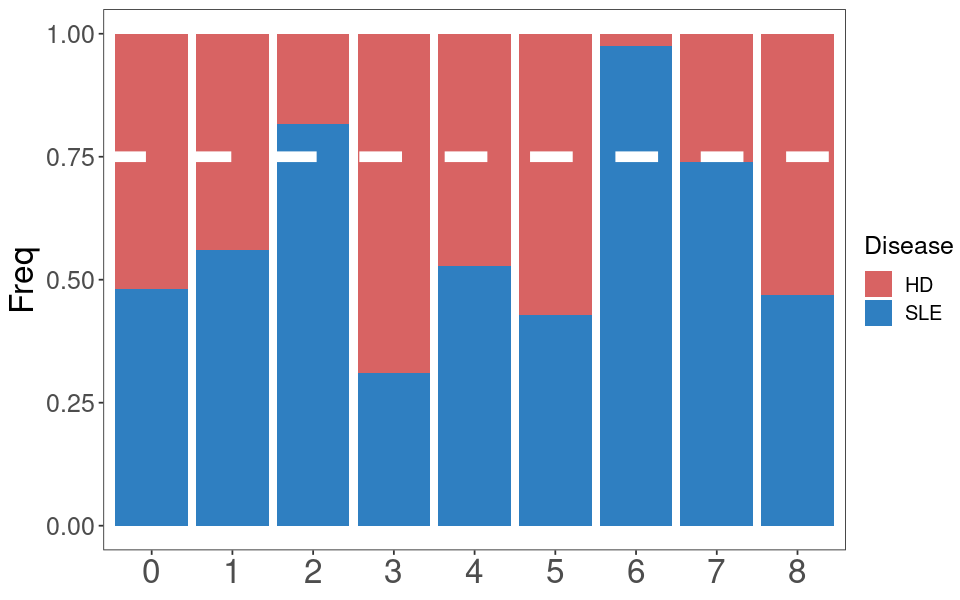

In [12]:
options(repr.plot.width=8)
count<-as.data.frame(table(sle_sub2@meta.data$seurat_clusters,sle_sub2@meta.data$orig.ident))
count$Var2<-toupper(count$Var2)
colnames(count)<-c('Var1','Disease','Freq')
p<-ggplot(count)+geom_bar(aes(x=Var1,y=Freq,fill=Disease),stat='identity',position = 'fill')+theme_test()+geom_hline(yintercept=0.75,size=3,color='white',lty=2)+
theme( 
      axis.text.x=element_text(size=20),
      axis.title.x=element_blank(),
     # axis.ticks.x=element_blank(),
      axis.title.y=element_text(size=20),
     axis.text.y=element_text(size=15),
    legend.title=element_text(size=15),
legend.text=element_text(size=12),legend.position = 'right')+
scale_fill_manual(values=c('#d86363','#2f7fc1'))
p
ggsave(p, file="./sle_picture/B/B_bar.pdf",width = 8, height = 5)

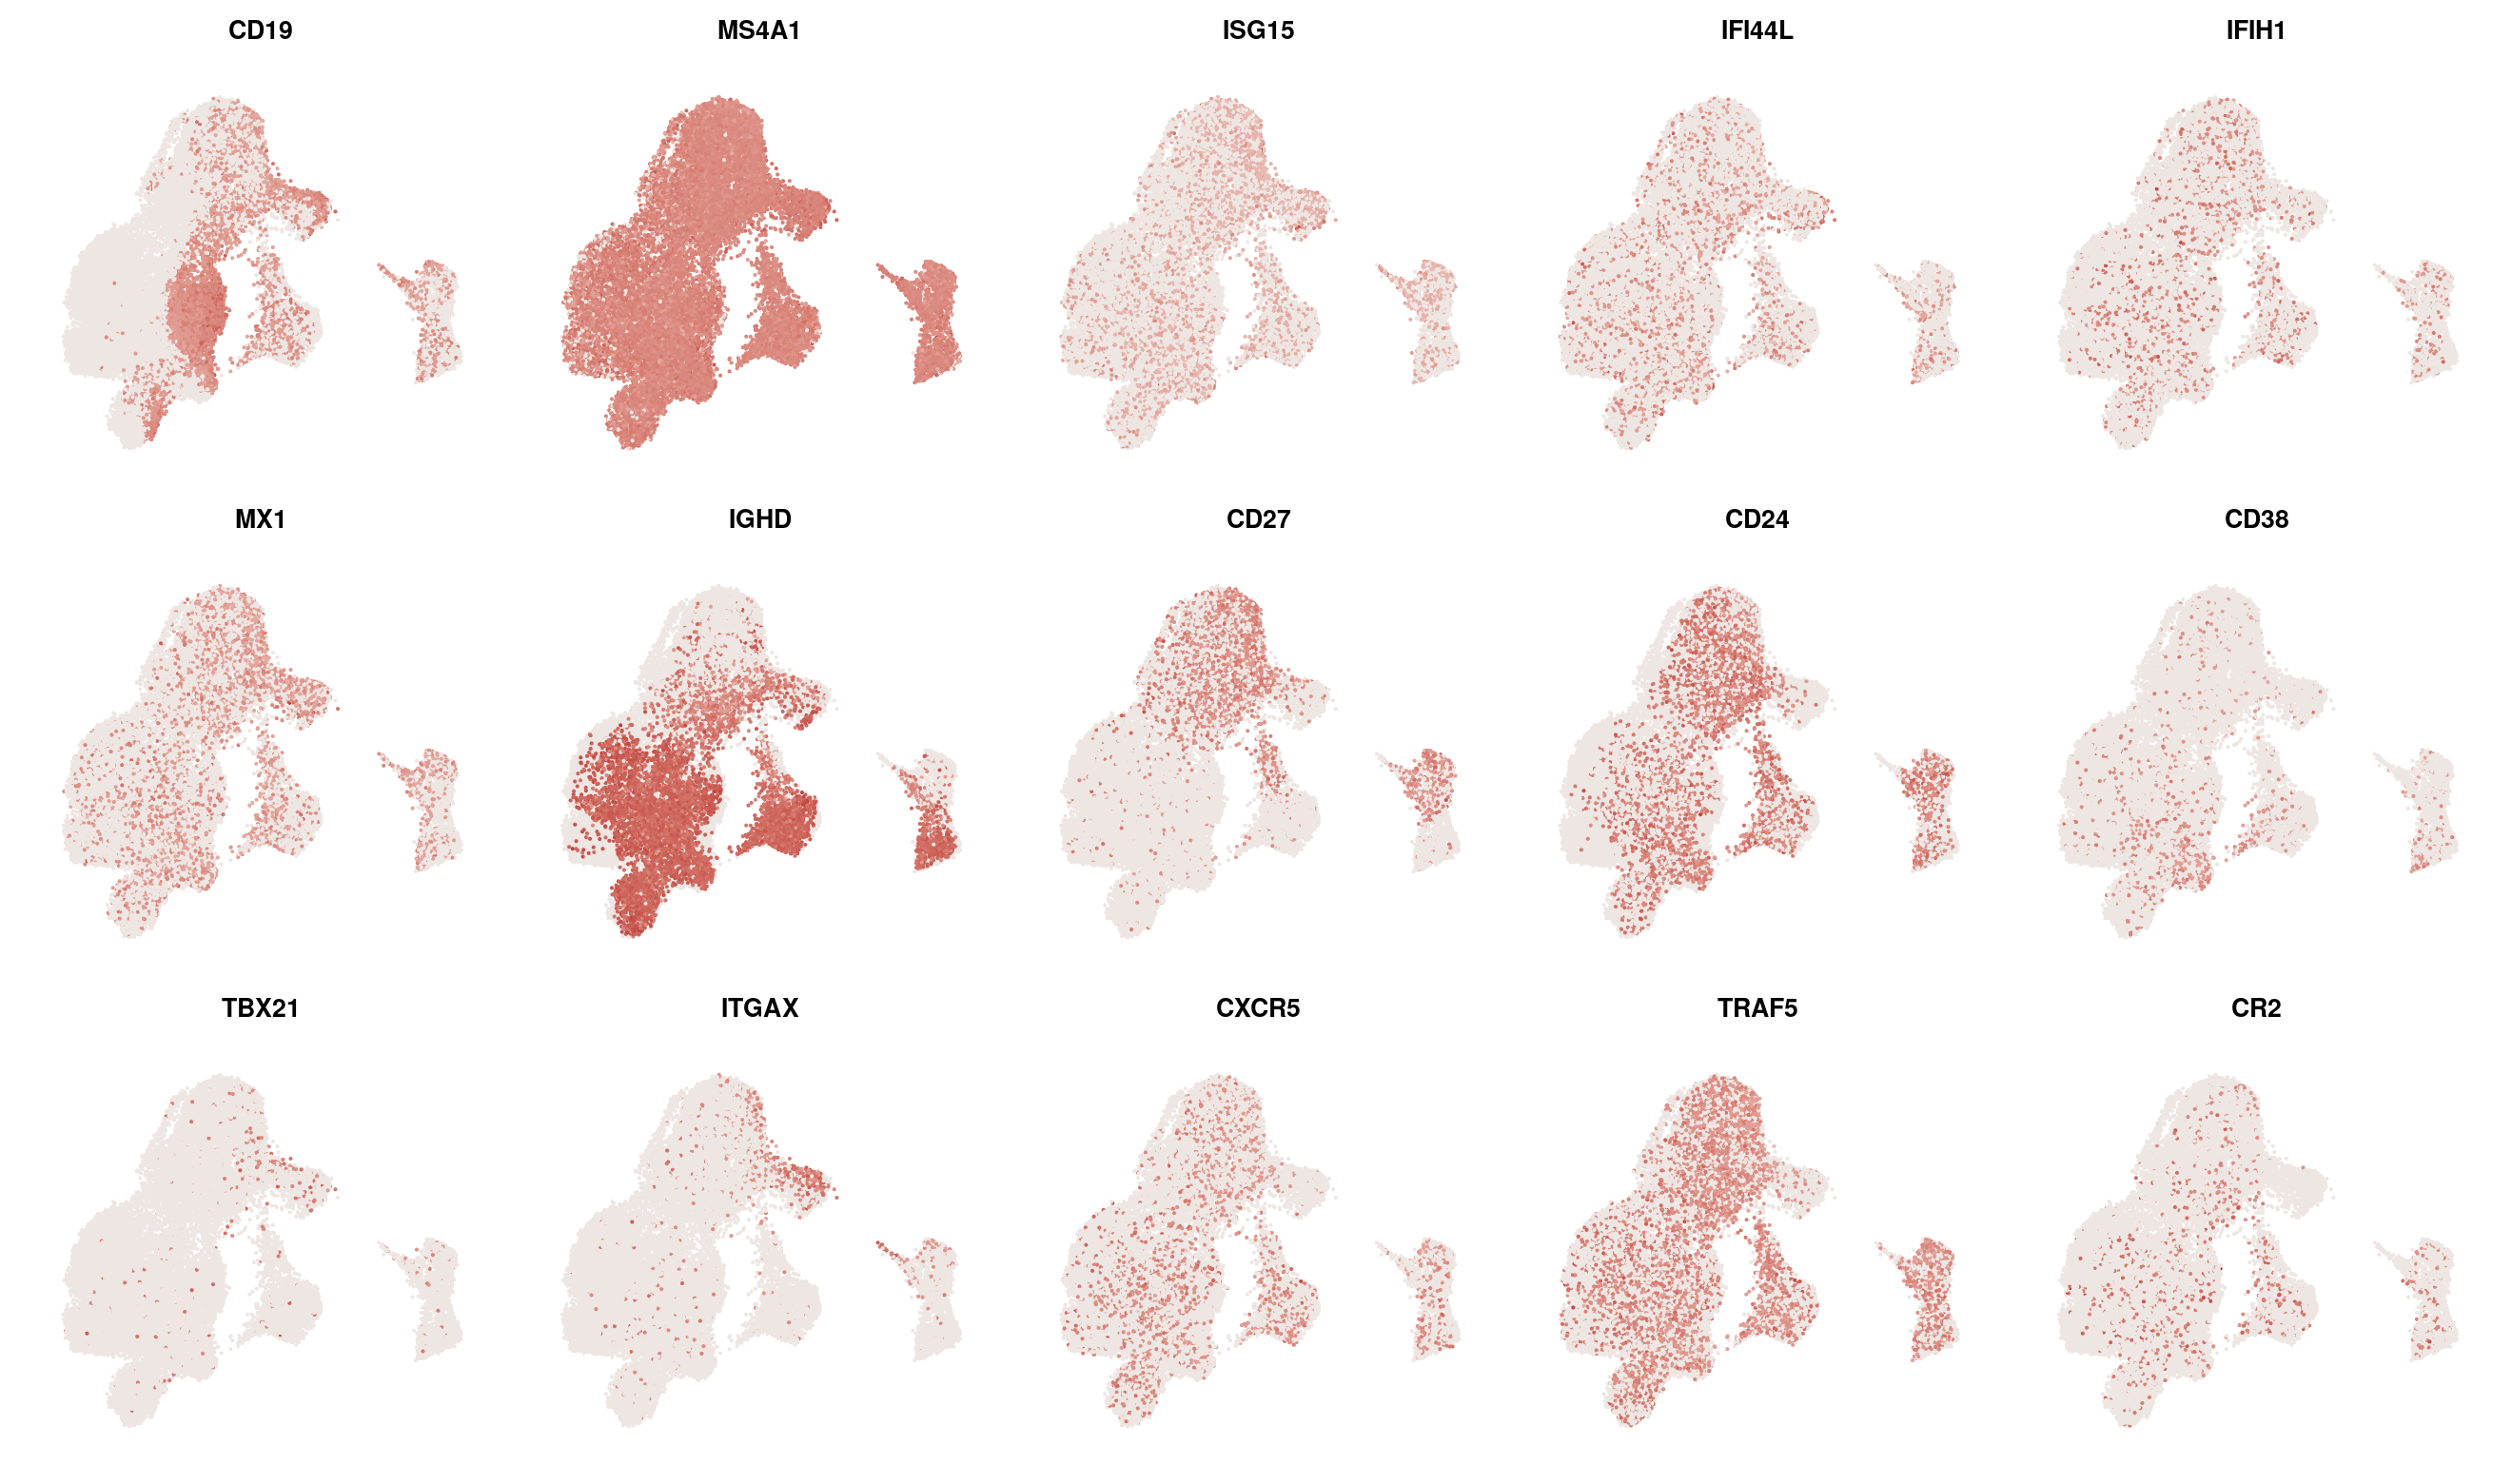

In [13]:
options(repr.plot.width=22,repr.plot.height=13)
DefaultAssay(sle_sub2)<-'RNA'
features=c('CD19',"MS4A1","ISG15","IFI44L","IFIH1","MX1","IGHD","CD27","CD24","CD38","TBX21","ITGAX","CXCR5","TRAF5","CR2")
p<-FeaturePlot(sle_sub2,features=features,cols=c('#eee6e3','#bd3c39'),pt.size=.5,ncol=5)&NoAxes()&NoLegend()
p
ggsave(p, file="./sle_picture/B/b_feature.pdf",width = 22, height = 15)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



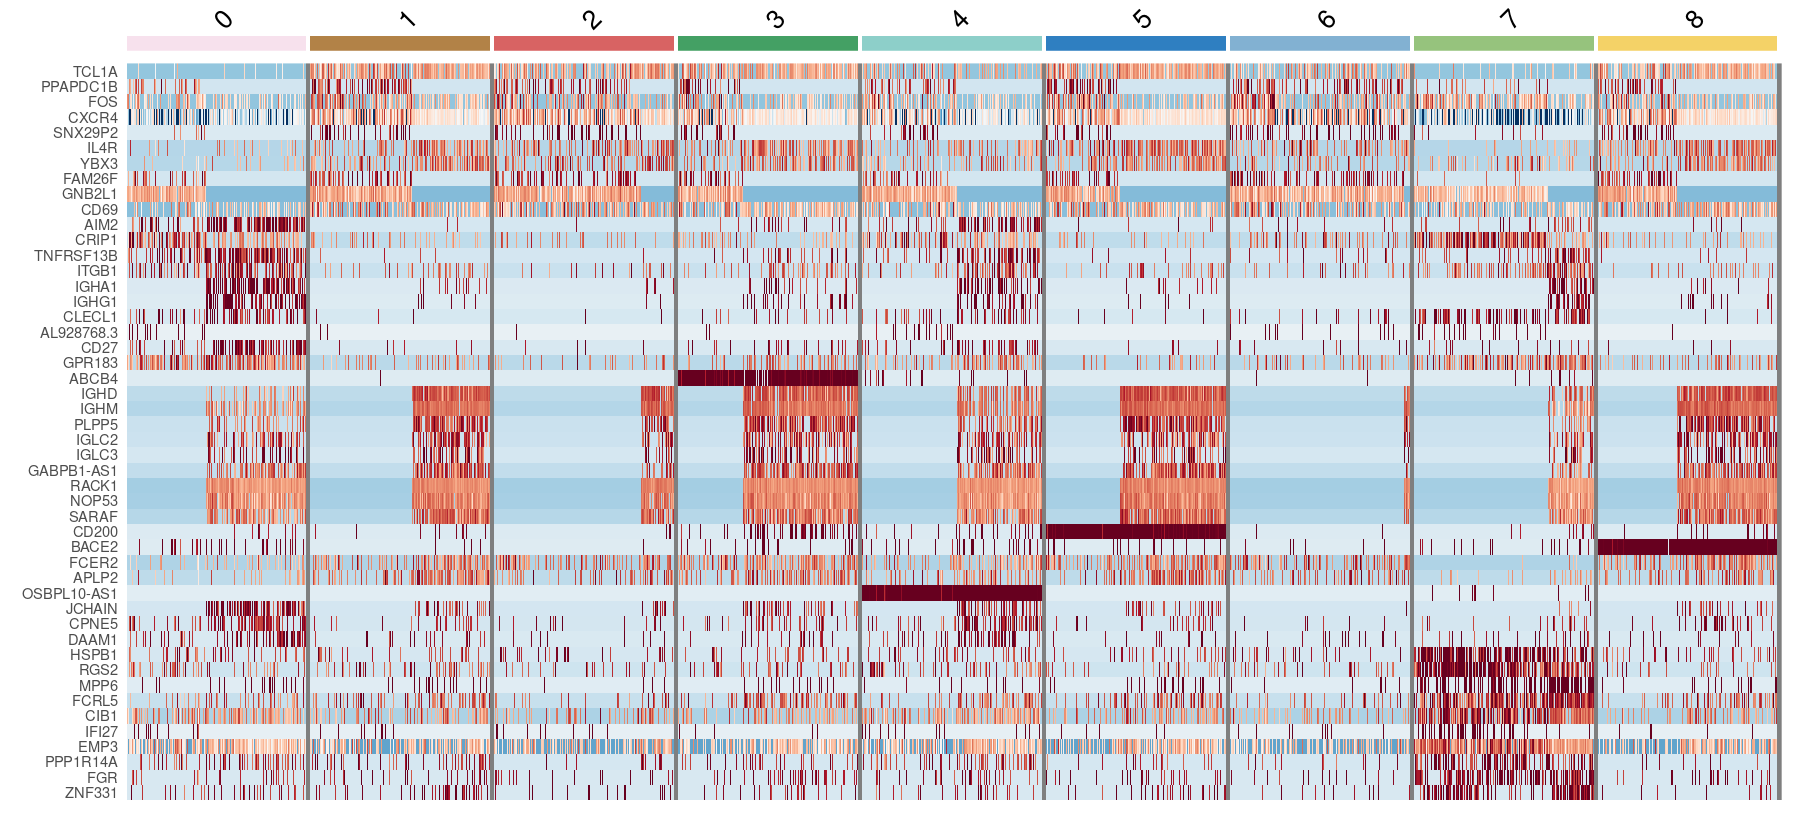

In [16]:
options(repr.plot.width=15,repr.plot.height=7)
DefaultAssay(sle_sub2)<-'RNA'
markerb<-read.csv('./sle_b_cell_cluster_marker.csv')
genea<-markerb%>%  group_by(cluster) %>%
    slice_max(n = 10, order_by = avg_log2FC)
#sle_sub2<-ScaleData(sle_sub2)
#sle_sub2<-ScaleData(sle_sub2)
p<-DoHeatmap(subset(sle_sub2,downsample=300),features=genea$gene,group.colors =c('#f7e1ed','#b28247','#d86363','#44a064','#8dcfc9', '#2f7fc1','#82b1d2','#96c37d','#f4d267') )+NoLegend()+scale_fill_gradientn(colors = rev(RColorBrewer::brewer.pal(n =11, name = "RdBu")) ) + guides(color="none")
p
ggsave(p, file="./sle_picture/B/B_heatmap1.pdf",width = 15, height = 7)

## mono

In [10]:
###mono
DefaultAssay(sle)<-'integrated'
sle_sub3<-subset(sle,seurat_clusters%in%c(0,7,8,9))
sle_sub3<-RunPCA(sle_sub3)
sle_sub3 <- RunUMAP(object = sle_sub3, dims = 1:20)
sle_sub3 <- FindNeighbors(sle_sub3 , reduction = "pca", dims = 1:20)
sle_sub3<-FindClusters(sle_sub3,res=0.3)

PC_ 1 
Positive:  ETS1, RPS27, RPL3, AES, RPS3, RPS6, IL32, LTB, RPS29, RPS18 
	   CD3E, CLEC2D, RPL13, RPSA, RPS5, CD3D, IL7R, CD3G, RPS12, EVL 
	   CD2, ARL4C, RPL10A, MALAT1, STK17A, SYNE2, CD69, LDHB, IKZF3, NPM1 
Negative:  SERPINA1, TNFAIP2, NCF2, FCN1, CSTA, CFD, CLEC7A, MNDA, FGL2, MPEG1 
	   LILRB2, CD14, CD68, LILRB3, LRP1, TIMP2, CYBB, SLC11A1, C5AR1, CSF3R 
	   PILRA, MS4A6A, DMXL2, SPI1, IGSF6, VCAN, CLEC12A, CPVL, IRAK3, NAMPT 
PC_ 2 
Positive:  CDKN1C, HES4, CKB, TCF7L2, CTSL, MS4A4A, FCGR3A, CASP5, NEURL1, SIGLEC10 
	   C1QA, RRAS, RHOC, CEACAM3, VMO1, ZNF703, BATF3, MTSS1, PTP4A3, FMNL2 
	   FCGR3B, L1TD1, CAMK1, CSF1R, ABI3, IL3RA, MGLL, CDH23, ICAM4, KCNMA1 
Negative:  S100A12, VCAN, PADI4, CD14, CLEC4E, STEAP4, CRISPLD2, MGST1, CYP1B1, QPCT 
	   CSF3R, SLC2A3, CREB5, CD163, MARC1, CLEC4D, VNN2, F5, CD93, NAIP 
	   SELL, S100A8, CD36, ITGAM, RNASE2, RBP7, BST1, S1PR3, ASGR2, LINC00937 
PC_ 3 
Positive:  C15orf48, DNAAF1, CCL4L2, KCNJ2, KCNJ2-AS1, IL1B, TNFAIP6, IL6, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 91724
Number of edges: 2534374

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9029
Number of communities: 11
Elapsed time: 35 seconds


1 singletons identified. 10 final clusters.



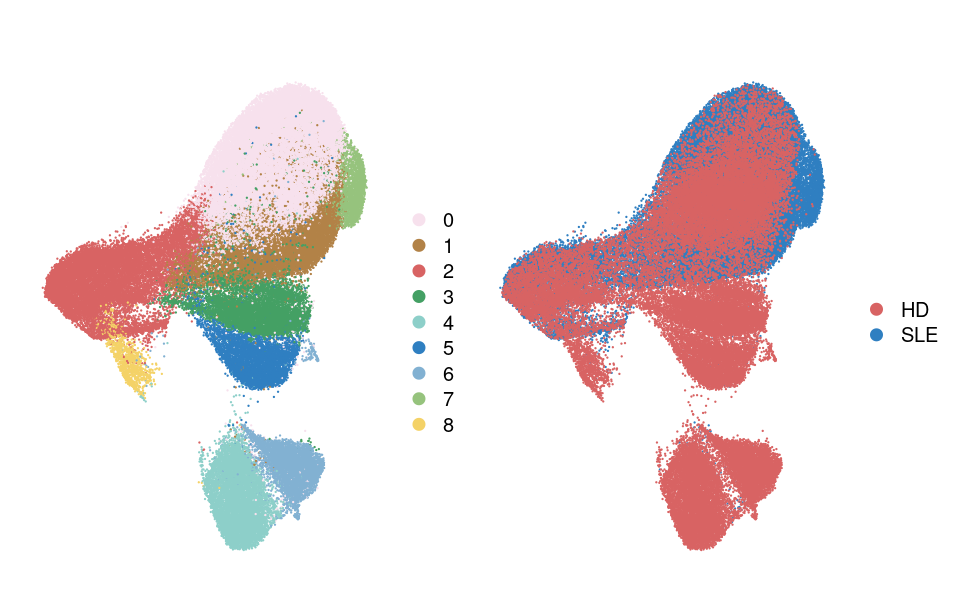

In [11]:
dir.create("./sle_picture2/mono/")
options(repr.plot.width=8,repr.plot.height=5)
DefaultAssay(sle_sub3)<-'integrated'
sle_sub3<-subset(sle_sub3,seurat_clusters!=9)#由前面的cluster图可以看出cluster9的数目非常少，所以去掉
sle_sub3@meta.data$orig.ident<-toupper(sle_sub3@meta.data$orig.ident)
p1<-DimPlot(sle_sub3,group.by='seurat_clusters',label=F,raster=F,label.size=6,repel=T,pt.size=0.01,cols=c('#f7e1ed','#b28247','#d86363','#44a064','#8dcfc9',
                                            '#2f7fc1','#82b1d2','#96c37d','#f4d267'))+theme(
                                                                              axis.title.x=element_blank(),
                                                                              axis.text.x=element_blank(),
                                                                              axis.ticks.x=element_blank(),
                                                                              axis.title.y=element_blank(),
                                                                              axis.text.y=element_blank(),
                                                                              axis.ticks.y=element_blank(),
                                                                              axis.line=element_blank())+labs(title='')
p2<-DimPlot(sle_sub3,group.by=c('orig.ident'),label=F,raster=F,label.size=4,repel=T,pt.size=0.01,cols=c('#d86363','#2f7fc1'))+theme(
                                                                              axis.title.x=element_blank(),
                                                                              axis.text.x=element_blank(),
                                                                              axis.ticks.x=element_blank(),
                                                                              axis.title.y=element_blank(),
                                                                              axis.text.y=element_blank(),
                                                                              axis.ticks.y=element_blank(),
                                                                              axis.line=element_blank())+labs(title='')


p<-p1+p2
p
ggsave(p,file="./sle_picture2/mono/mono_dimplot.pdf",width = 8, height = 5)

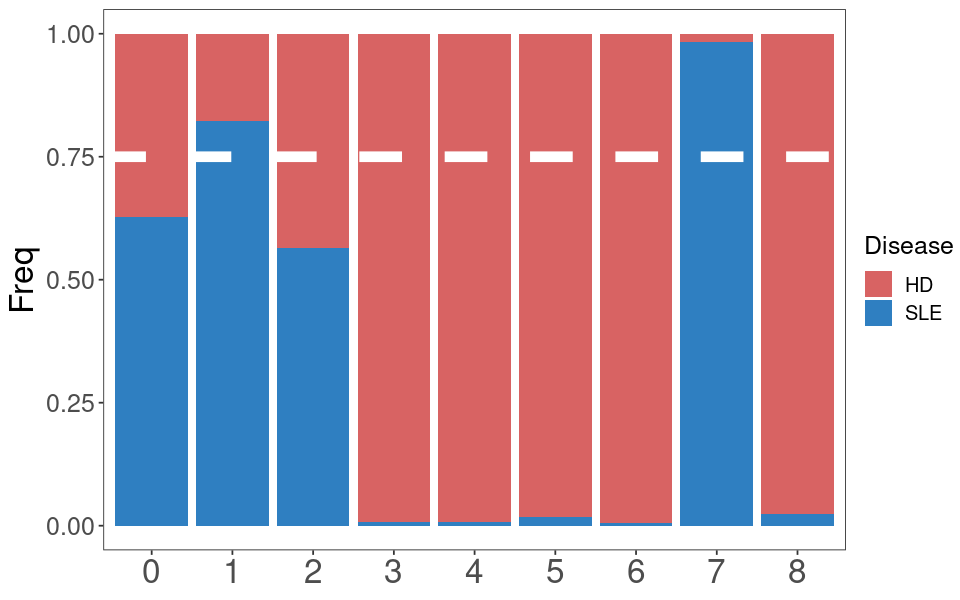

In [19]:
options(repr.plot.width=8)
count<-as.data.frame(table(sle_sub3@meta.data$seurat_clusters,sle_sub3@meta.data$orig.ident))
count$Var2<-toupper(count$Var2)
colnames(count)<-c('Var1','Disease','Freq')
p<-ggplot(count[count$Var1!='9',])+geom_bar(aes(x=Var1,y=Freq,fill=Disease),stat='identity',position = 'fill')+theme_test()+geom_hline(yintercept=0.75,size=3,color='white',lty=2)+
theme( 
      axis.text.x=element_text(size=20),
      axis.title.x=element_blank(),
     # axis.ticks.x=element_blank(),
      axis.title.y=element_text(size=20),
     axis.text.y=element_text(size=15),
    legend.title=element_text(size=15),
legend.text=element_text(size=12),legend.position = 'right')+
scale_fill_manual(values=c('#d86363','#2f7fc1'))
p
ggsave(p,file="./sle_picture/mono/mono_bar.pdf",width = 8, height = 5)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



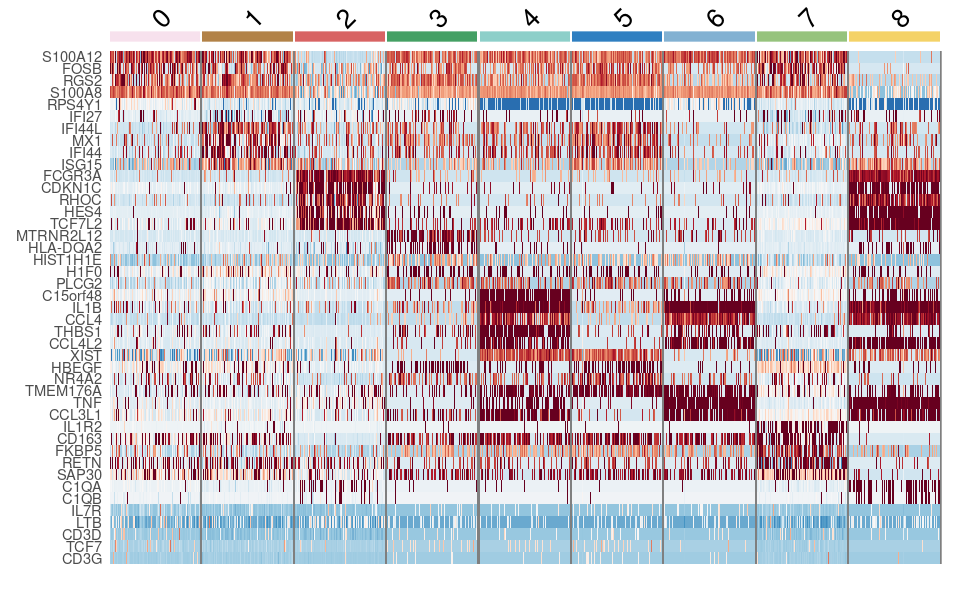

In [20]:
DefaultAssay(sle_sub3)<-'integrated'
marker_mono<-read.csv('./differential_marker_mono',row.names=1)
geneb<-marker_mono%>%  group_by(cluster) %>%
    slice_max(n = 5, order_by = avg_log2FC)
p<-DoHeatmap(sle_sub3[,sample(1:dim(sle_sub3)[2],30000),downsample=300],features=geneb$gene,group.colors =c('#f7e1ed','#b28247','#d86363','#44a064','#8dcfc9','#2f7fc1','#82b1d2','#96c37d','#f4d267'))+NoLegend()+scale_fill_gradientn(colors = rev(RColorBrewer::brewer.pal(n =11, name = "RdBu")) ) + guides(color="none")
#DoHeatmap(subset(sle_sub2,downsample=300),features=genea$gene)+NoLegend()+scale_fill_gradientn(colors = rev(RColorBrewer::brewer.pal(n =11, name = "RdBu")) ) + guides(color="none")

#,downsample=300可以调节每个clutser的比例，将宽度固定在300
p
ggsave(p,file="./sle_picture/mono/mono_heatmap1.pdf",width = 8, height = 5)

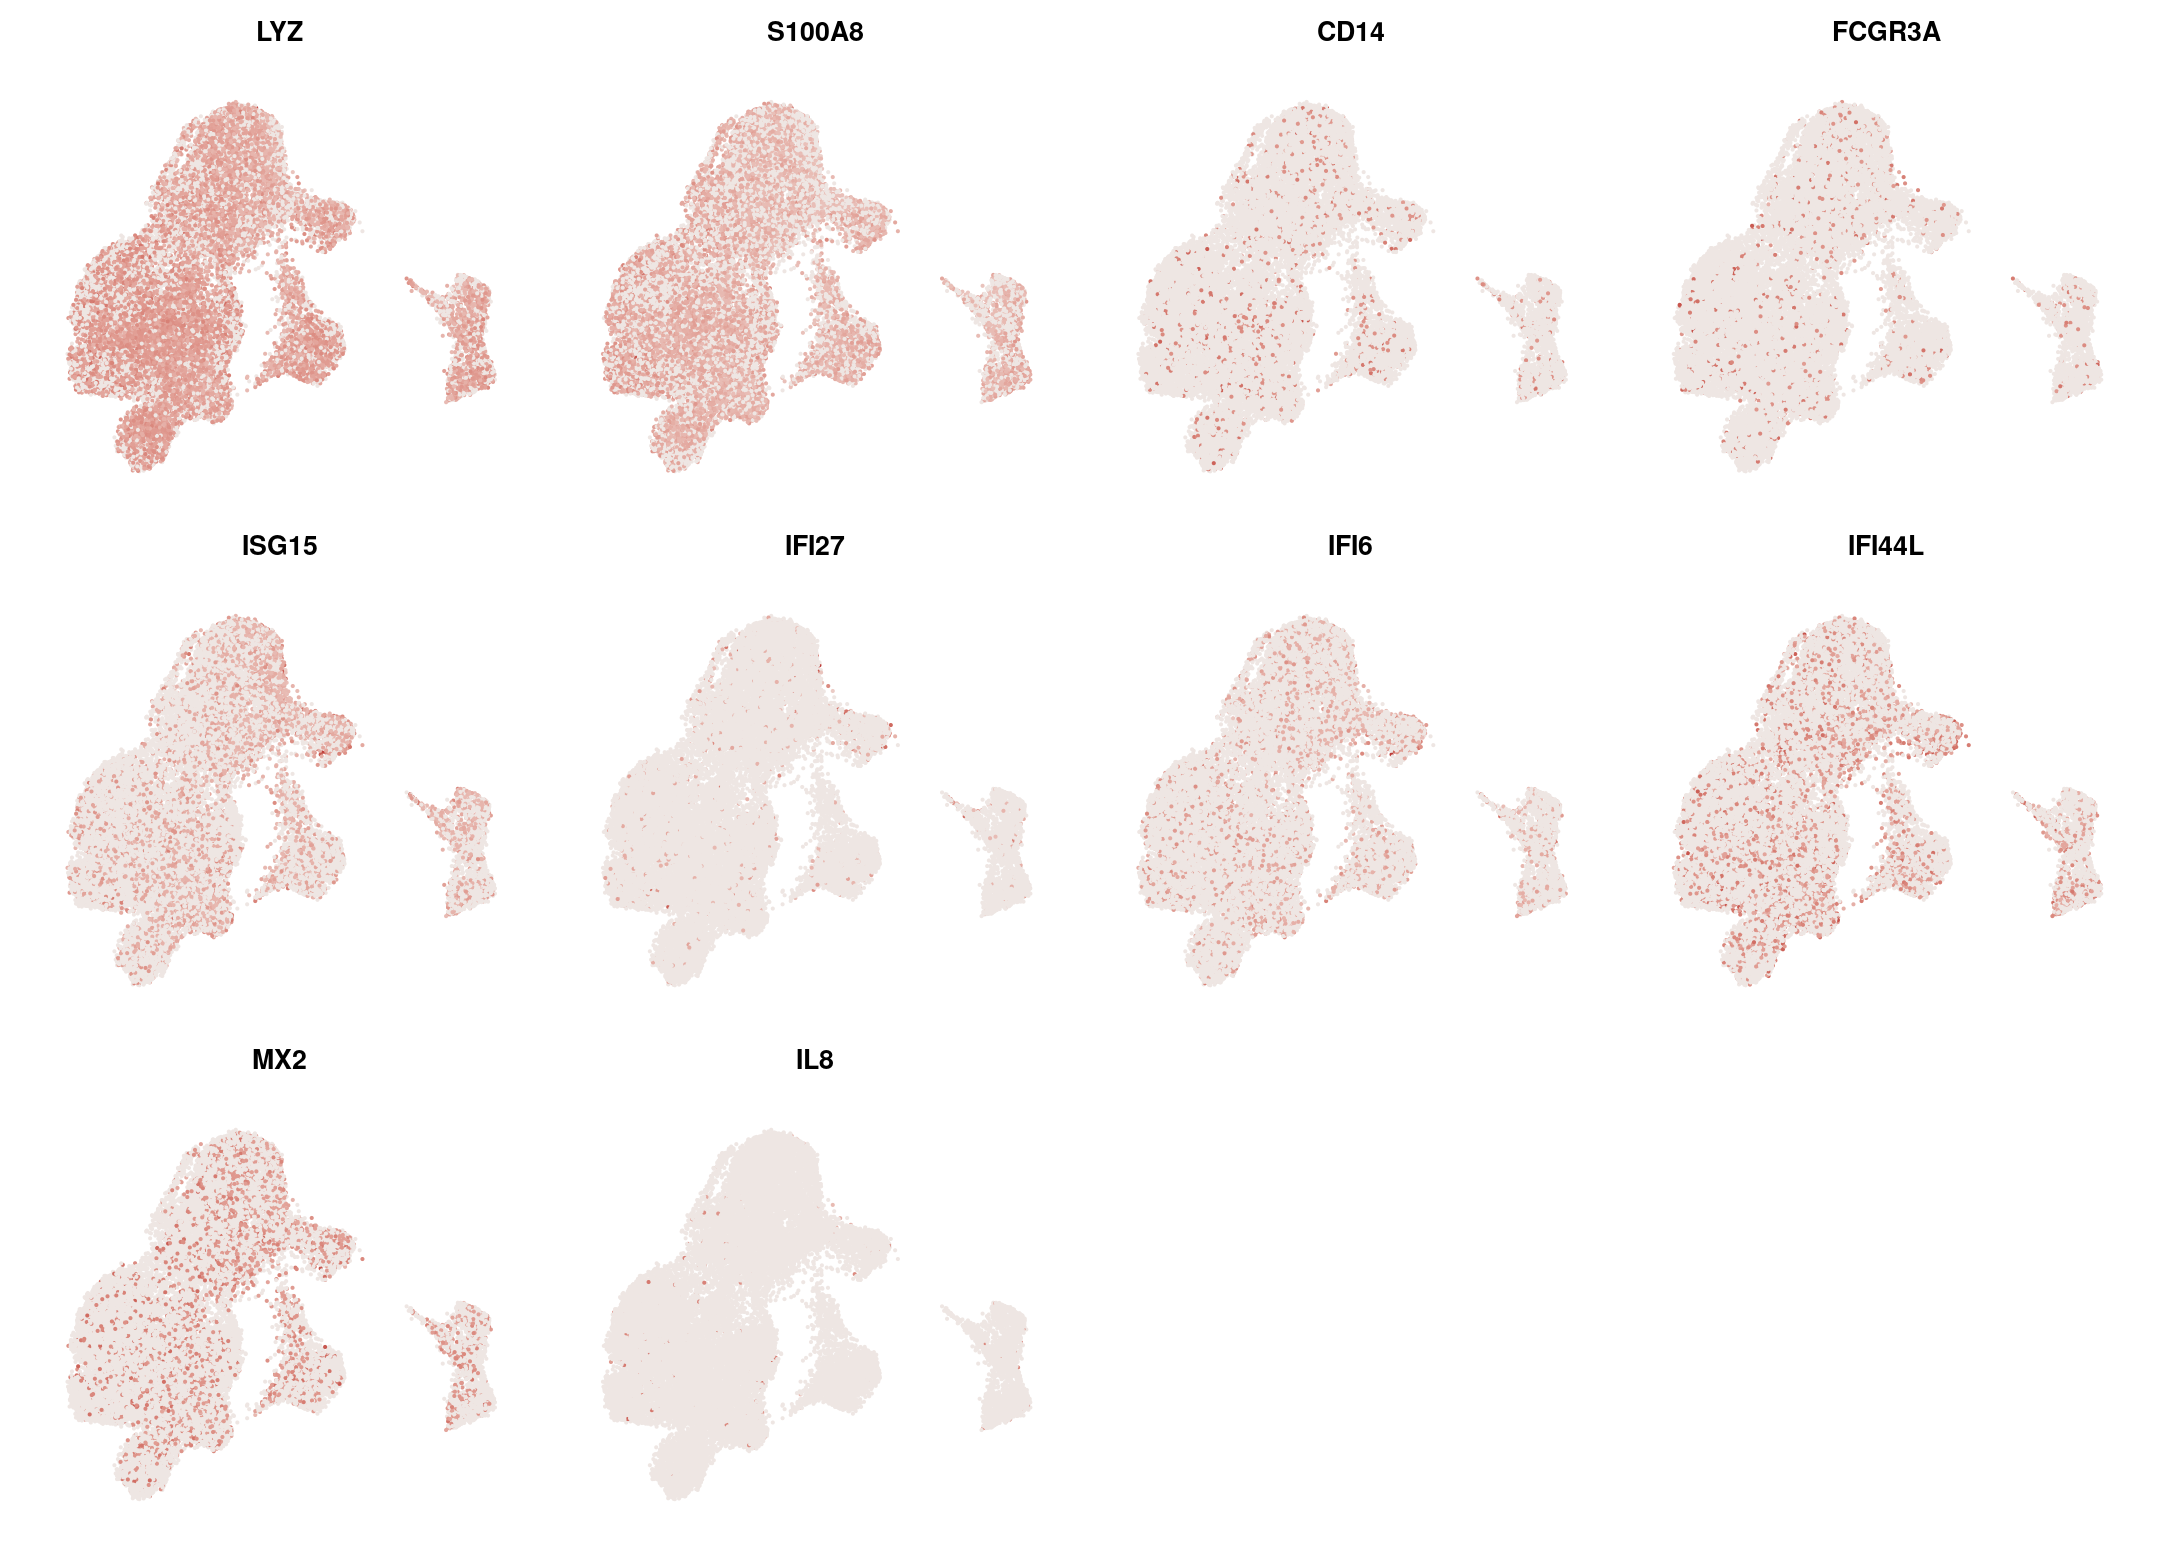

In [24]:
#无坐标轴版本
options(repr.plot.width=18,repr.plot.height=13)
DefaultAssay(sle_sub3)<-'RNA'
features=c('LYZ','S100A8','CD14','FCGR3A','ISG15','IFI27','IFI6','IFI44L','MX2','IL8')
FeaturePlot(sle_sub2,features=features,cols=c('#eee6e3','#bd3c39'),pt.size=.5,ncol=4)&NoLegend()&NoAxes()
ggsave(file="./sle_picture/mono/mono_feature.pdf",width = 18, height = 13)

## DC

In [12]:
####dc
DefaultAssay(sle)<-'integrated'
sle_sub4<-subset(sle,seurat_clusters%in%c(12,16))
sle_sub4<-RunPCA(sle_sub4)
sle_sub4 <- RunUMAP(object = sle_sub4, dims = 1:20)
sle_sub4 <- FindNeighbors(sle_sub4 , reduction = "pca", dims = 1:20)
sle_sub4<-FindClusters(sle_sub4,res=0.1)

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 3 features requested have zero variance (running reduction without them): OR2B6, GYPB, ESM1”
PC_ 1 
Positive:  KLF2, BTG1, CD52, GIMAP7, IL32, TSC22D3, TXNIP, IL7R, EVL, TMSB4X 
	   CD3D, CD3E, CLEC2D, RARRES3, ETS1, CD3G, MALAT1, SLFN5, SYNE2, CD69 
	   IKZF3, SKAP1, CD247, SPOCK2, KIAA1551, TCF7, NEAT1, LCK, STK17A, PIK3IP1 
Negative:  SERPINF1, FCER1A, SCN9A, LILRA4, CLEC4C, GAS6, DNASE1L3, SMPD3, PLD4, SCT 
	   EPHB1, IL3RA, MAP1A, TNFRSF21, LAMP5, PACSIN1, LRRC26, LINC00996, TPM2, FLT3 
	   SCAMP5, LGMN, DERL3, IRF4, CIB2, ZFAT, ENHO, PHEX, MYBL2, P2RY14 
PC_ 2 
Positive:  LILRA4, CLEC4C, MAP1A, SCT, LINC00996, PACSIN1, EPHB1, SMPD3, LRRC26, TPM2 
	   DERL3, DNASE1L3, SCAMP5, IL3RA, MYBL2, PHEX, ZFAT, ASIP, CYP46A1, PTCRA 
	   CIB2, PLVAP, PLXNA4, TNFRSF21, CUX2, MZB1, TSPAN13, LAMP5, PROC, SMIM5 
Negative:  ENHO, FCER1A, CLEC10A, CD1C, PKIB, CD1E, CLIC2, NDRG2, CACNA2D3, GRIP1 
	   

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6639
Number of edges: 239588

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9402
Number of communities: 3
Elapsed time: 0 seconds


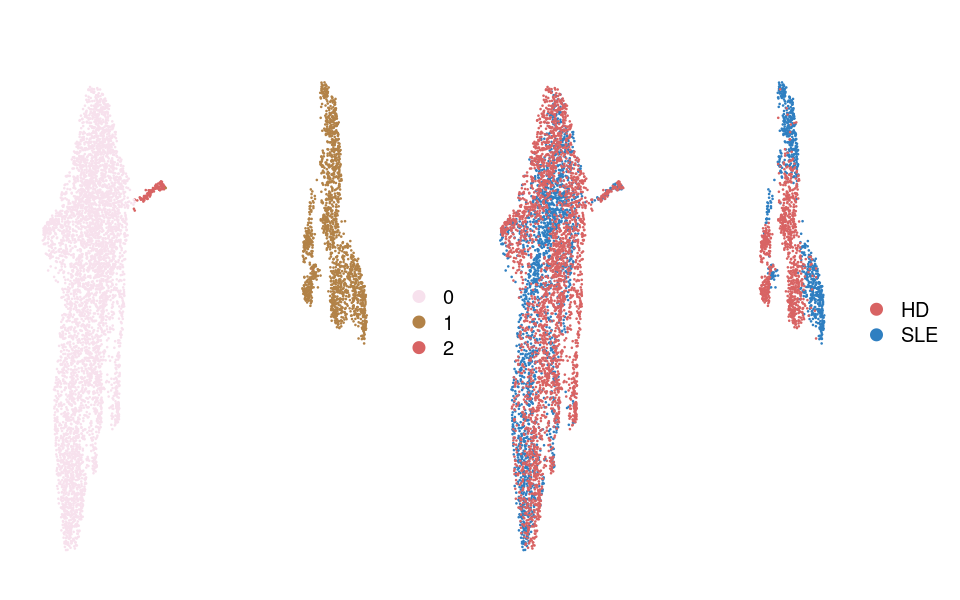

In [13]:
options(repr.plot.width=8,repr.plot.height=5)
dir.create("./sle_picture2/DC/")
sle_sub4@meta.data$orig.ident<-toupper(sle_sub4@meta.data$orig.ident)
p1<-DimPlot(sle_sub4,group.by='seurat_clusters',label=F,raster=F,label.size=6,repel=T,pt.size=0.1,cols=c('#f7e1ed','#b28247','#d86363'))+theme(
                                                                              axis.title.x=element_blank(),
                                                                              axis.text.x=element_blank(),
                                                                              axis.ticks.x=element_blank(),
                                                                              axis.title.y=element_blank(),
                                                                              axis.text.y=element_blank(),
                                                                              axis.ticks.y=element_blank(),
                                                                              axis.line=element_blank())+labs(title='')
p2<-DimPlot(sle_sub4,group.by=c('orig.ident'),label=F,raster=F,label.size=4,repel=T,pt.size=0.1,cols=c('#d86363','#2f7fc1'))+theme(
                                                                              axis.title.x=element_blank(),
                                                                              axis.text.x=element_blank(),
                                                                              axis.ticks.x=element_blank(),
                                                                              axis.title.y=element_blank(),
                                                                              axis.text.y=element_blank(),
                                                                              axis.ticks.y=element_blank(),
                                                                              axis.line=element_blank())+labs(title='')
p<-p1+p2
p
ggsave(p,file="./sle_picture2/DC/DC_heatmap.pdf",width = 8, height = 5)

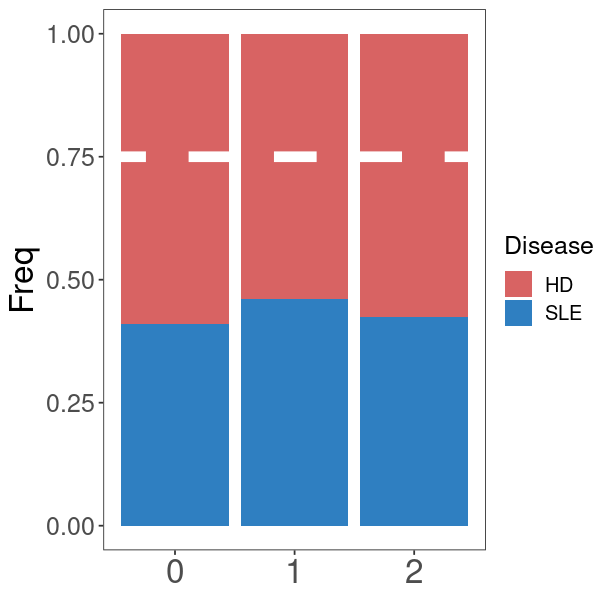

In [27]:
options(repr.plot.width=5,repr.plot.height=5)
count<-as.data.frame(table(sle_sub4@meta.data$seurat_clusters,sle_sub4@meta.data$orig.ident))
count$Var2<-toupper(count$Var2)
colnames(count)<-c('Var1','Disease','Freq')
p<-ggplot(count)+geom_bar(aes(x=Var1,y=Freq,fill=Disease),stat='identity',position = 'fill')+theme_test()+geom_hline(yintercept=0.75,color='white',size=3,lty=2)+
theme( 
      axis.text.x=element_text(size=20),
      axis.title.x=element_blank(),
     # axis.ticks.x=element_blank(),
      axis.title.y=element_text(size=20),
     axis.text.y=element_text(size=15),
    legend.title=element_text(size=15),
legend.text=element_text(size=12),legend.position = 'right')+
scale_fill_manual(values=c('#d86363','#2f7fc1'))
p
ggsave(p,file="./sle_picture/DC/DC_bar.pdf",width = 5, height = 5)

## ALL

In [ ]:
options(repr.plot.width=16,repr.plot.height=5)
dir.create("./sle_picture2/ALL/")
sle<-FindClusters(sle,res=0.1)
orig<-sle@meta.data$orig.ident
orig[orig=='sle']<-'SLE'
orig[orig=='hd']<-'HD'
sle@meta.data$orig.ident<-orig
p1<-DimPlot(sle, ,label=F,raster=F,label.size=6,repel=T,pt.size=0.01,cols=c("#f7e1ed",'#b28247','#d86363','#44a064','#8dcfc9',
                                            '#2f7fc1','#82b1d2','#96c37d','#f4d267','#e88482','#c498b2', '#9394e7' ,'#e7dad2','#fea3a2','#dae06d','#5c85a5'))+theme(
                                                                              axis.title.x=element_blank(),
                                                                              axis.text.x=element_blank(),
                                                                              axis.ticks.x=element_blank(),
                                                                              axis.title.y=element_blank(),
                                                                              axis.text.y=element_blank(),
                                                                              axis.ticks.y=element_blank(),
                                                                              axis.line=element_blank())+labs(title='')
p2<-DimPlot(sle,group.by=c('orig.ident'),label=F,raster=F,label.size=4,repel=T,pt.size=0.01,cols=c('#d86363','#2f7fc1'))+theme(
                                                                              axis.title.x=element_blank(),
                                                                              axis.text.x=element_blank(),
                                                                              axis.ticks.x=element_blank(),
                                                                              axis.title.y=element_blank(),
                                                                              axis.text.y=element_blank(),
                                                                              axis.ticks.y=element_blank(),
                                                                              axis.line=element_blank())+labs(title='')



p
p<-p1+p2
ggsave(p,file="./sle_picture2/ALL/all_dimplot.pdf",width = 16, height = 5)


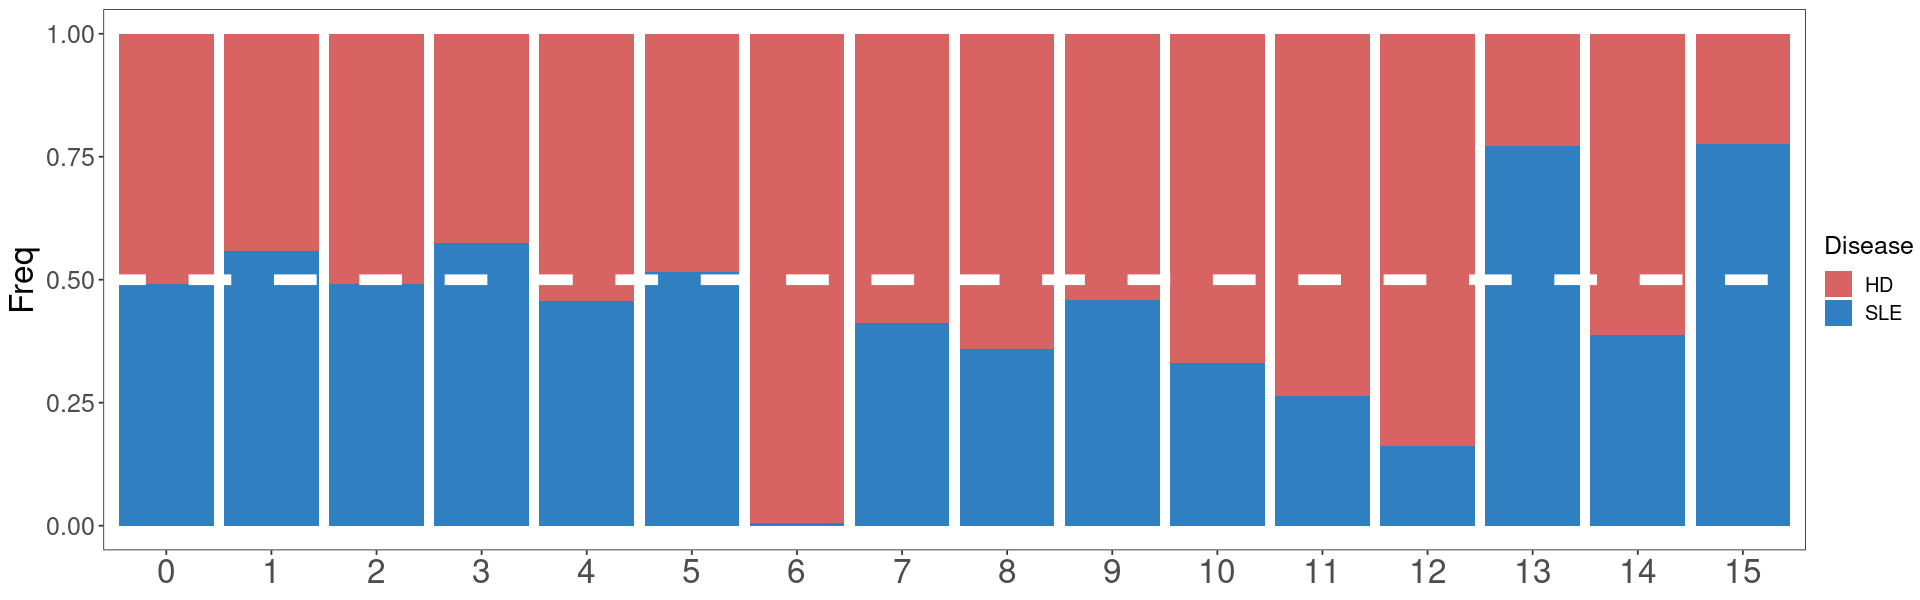

In [29]:
options(repr.plot.width=16,repr.plot.height=5)
count<-as.data.frame(table(sle@meta.data$seurat_clusters,sle@meta.data$orig.ident))
colnames(count)<-c('Var1','Disease','Freq')
p<-ggplot(count)+geom_bar(aes(x=Var1,y=Freq,fill=Disease),stat='identity',position = 'fill')+theme_test()+geom_hline(yintercept=0.5,size=3,color='white',lty=2)+
theme( 
      axis.text.x=element_text(size=20),
      axis.title.x=element_blank(),
     # axis.ticks.x=element_blank(),
      axis.title.y=element_text(size=20),
     axis.text.y=element_text(size=15),
    legend.title=element_text(size=15),
legend.text=element_text(size=12),legend.position = 'right')+
scale_fill_manual(values=c('#d86363','#2f7fc1'))
p
ggsave(p,file="./sle_picture/ALL/all_bar.pdf",width = 16, height = 5)

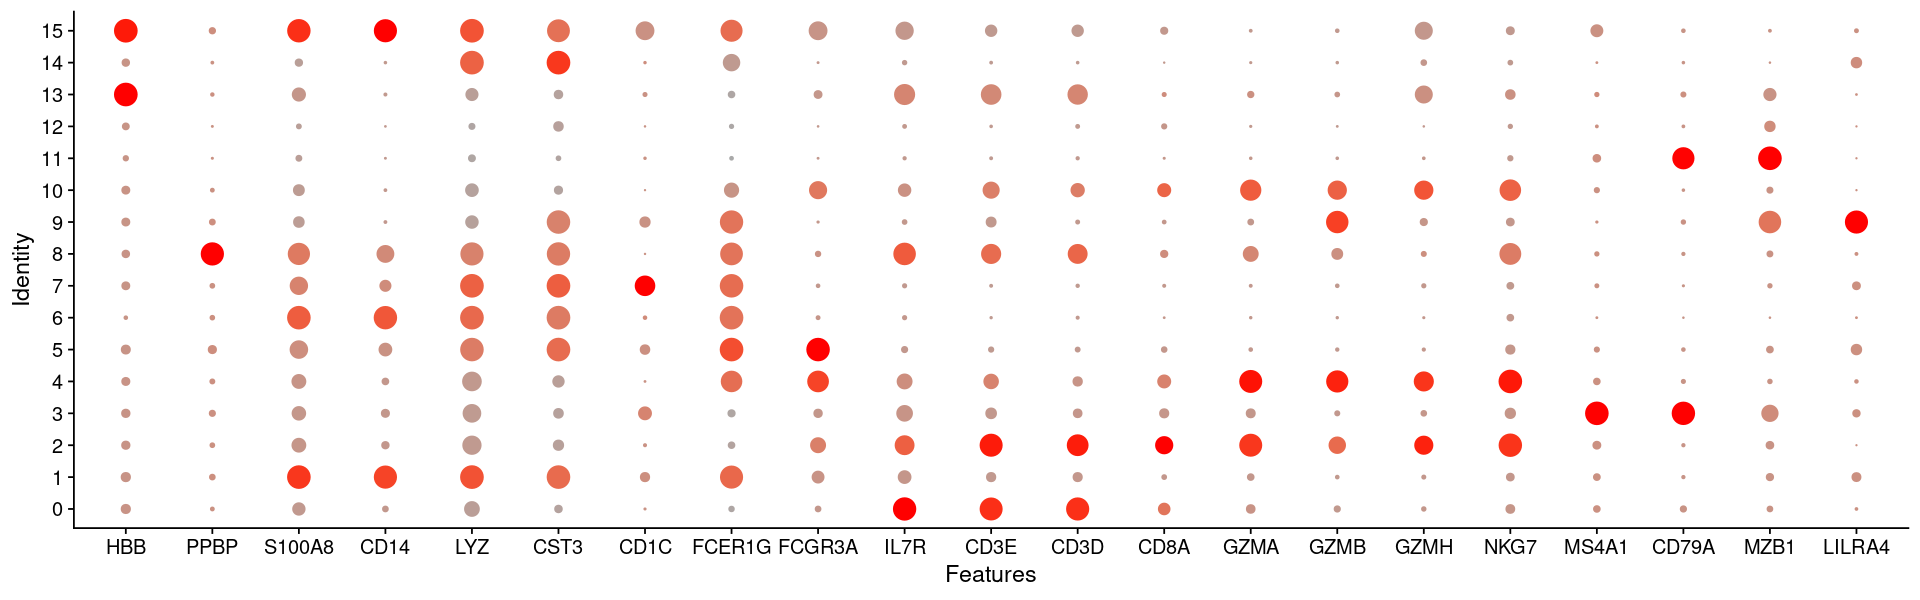

In [30]:
options(repr.plot.width=16,repr.plot.height=5)
gene<-c('HBB','PPBP','S100A8','CD14','LYZ','CST3','CD1C','FCER1G','FCGR3A','IL7R','CD3E','CD3D','CD8A','GZMA','GZMB',
       'GZMH','NKG7','MS4A1','CD79A','MZB1','LILRA4')
p<-DotPlot(sle,features=gene,cols=c('darkgrey','red'),scale = T)+NoLegend()
p
ggsave(p,file="./sle_picture/ALL/all_dotplot.pdf",width = 16, height = 5)